In [3]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf

In [13]:
!wget https://raw.githubusercontent.com/emilwallner/Coloring-greyscale-images-in-Keras/master/floydhub/Alpha-version/man.jpg
!wget https://raw.githubusercontent.com/emilwallner/Coloring-greyscale-images-in-Keras/master/floydhub/Alpha-version/swim.jpg
!wget https://raw.githubusercontent.com/emilwallner/Coloring-greyscale-images-in-Keras/master/floydhub/Alpha-version/woman.jpg
!ls

--2018-05-18 15:04:41--  https://raw.githubusercontent.com/emilwallner/Coloring-greyscale-images-in-Keras/master/floydhub/Alpha-version/man.jpg
S'està resolent raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.132.133
S'està connectant a raw.githubusercontent.com (raw.githubusercontent.com)|151.101.132.133|:443... conectat.
HTTP: s'ha enviat la petició, s'està esperant una resposta... 200 OK
Mida: 320290 (313K) [image/jpeg]
S'està desant a: «man.jpg.1»

man.jpg.1           100%[===================>] 312.78K  --.-KB/s    in 0.05s   

2018-05-18 15:04:41 (5.89 MB/s) - s'ha desat «man.jpg.1» [320290/320290]

--2018-05-18 15:04:41--  https://raw.githubusercontent.com/emilwallner/Coloring-greyscale-images-in-Keras/master/floydhub/Alpha-version/swim.jpg
S'està resolent raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.132.133
S'està connectant a raw.githubusercontent.com (raw.githubusercontent.com)|151.101.132.133|:443... conectat.
HTTP: s'ha enviat la petició, 

In [14]:
# Get images
image = img_to_array(load_img('man.jpg'))
image = np.array(image, dtype=float)
X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]
Y /= 128
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)

In [15]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [16]:
# Finish model
model.compile(optimizer='rmsprop', loss='mse')

In [17]:
model.fit(x=X, y=Y, batch_size=1, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 211ms/step - loss: 0.1506
Epoch 2/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0502
Epoch 3/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0199
Epoch 4/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0033
Epoch 5/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0023
Epoch 6/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0020
Epoch 7/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0019
Epoch 8/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0019
Epoch 9/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0018
Epoch 10/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0018
Epoch 11/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0017
Epoch 12/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0017
Epoch 13/1000
1/1 [=================

In [18]:
print(model.evaluate(X, Y, batch_size=1))

output = model.predict(X)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]
imsave("img_result.png", lab2rgb(cur))
imsave("img_gray_version.png", rgb2gray(lab2rgb(cur)))

1/1 [==============================] - 0s 48ms/step
0.0002798369387164712


/home/secorec/anaconda3/envs/env/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/home/secorec/anaconda3/envs/env/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


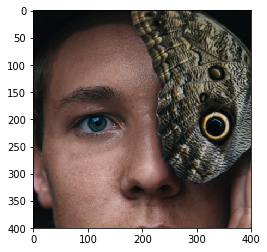

In [19]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(load_img('img_result.png'))
plt.show()

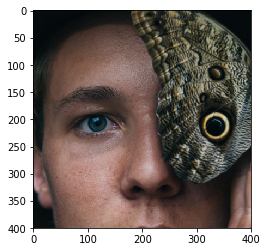

In [20]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(load_img('man.jpg'))
plt.show()

/home/secorec/anaconda3/envs/env/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/home/secorec/anaconda3/envs/env/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


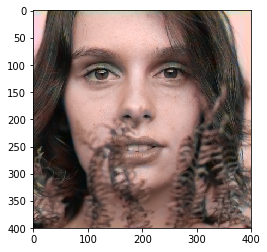

In [21]:
# Get images
image = img_to_array(load_img('woman.jpg'))
image = np.array(image, dtype=float)
X = rgb2lab(1.0/255*image)[:,:,0]
X = X.reshape(1, 400, 400, 1)

output = model.predict(X)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]
imsave("img_result.png", lab2rgb(cur))
imsave("img_gray_version.png", rgb2gray(lab2rgb(cur)))

import matplotlib.pyplot as plt
imgplot = plt.imshow(load_img('img_result.png'))
plt.show()

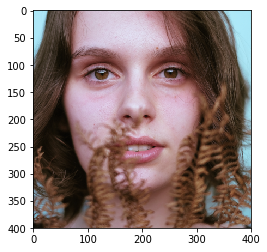

In [22]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(load_img('woman.jpg'))
plt.show()